In [11]:
# Loading dependencies
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sn

In [12]:
#Loading the MNIST dataset using Keras
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

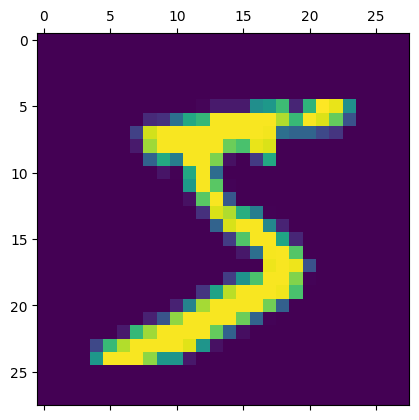

In [13]:
plt.matshow(X_train[0])

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [16]:
X_train_flattened.shape

(60000, 784)

In [17]:

X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1216 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0847 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0634 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9840


In [19]:

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0789 - accuracy: 0.9763


[0.07892809808254242, 0.9763000011444092]

313/313 [==============================] - 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

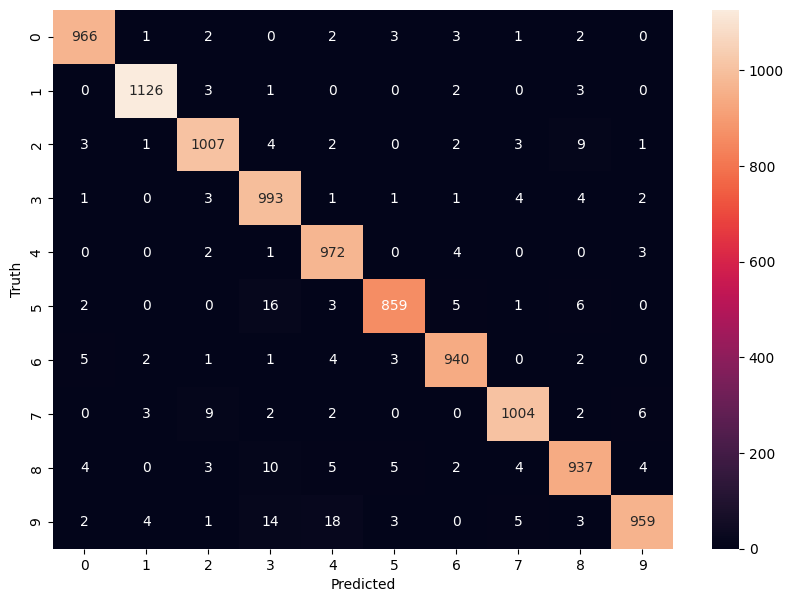

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')